In [1]:
"""
Author: Anuradha Wadekar
Title: Honda Used Car Selling🚗
Source: https://www.kaggle.com/datasets/themrityunjaypathak/honda-car-selling/code
"""

'\nAuthor: Anuradha Wadekar\nTitle: Honda Used Car Selling🚗\nSource: https://www.kaggle.com/datasets/themrityunjaypathak/honda-car-selling/code\n'

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('C:/Python/Python39/Scripts/PythonProjects/5 Honda Used Car Selling/DataSet/honda_car_selling.csv')

In [4]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [5]:
df.tail()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
994,2007,90000 kms,Petrol,Manual,1.22 Lakh,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25 Lakh,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10 Lakh,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10 Lakh,Honda City i VTEC S
998,2015,35341 kms,Diesel,Manual,3 Lakh,Honda Amaze S i-Dtech


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [7]:
df.shape

(999, 6)

In [8]:
df.nunique()

Year           22
kms Driven    693
Fuel Type       3
Suspension      2
Price         332
Car Model     183
dtype: int64

In [9]:
df.duplicated().sum()

25

In [10]:
df['Fuel Type'].duplicated().sum()

996

In [11]:
df.isnull().sum()

Year          0
kms Driven    0
Fuel Type     0
Suspension    0
Price         0
Car Model     0
dtype: int64

In [12]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [159]:
# Separating to get numbers only 
df[['Kms', 'kms', 'space']] = df["kms Driven"].str.split(' ', expand = True)
df[['space', 'Price (in lakh)', 'lakh']] = df["Price"].str.split(' ', expand = True)

In [14]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model,Kms,kms,space,Price (in lakh),lakh
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT,19006,kms,,9.29,Lakh
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT,11936,kms,,13.95,Lakh
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX,29635,kms,,9.95,Lakh
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT,16163,kms,,13.26,Lakh
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V,105114,kms,,5.68,Lakh


In [160]:
# Drop unnecessary columns
df.drop(['kms', 'kms Driven','space'], axis = 1, inplace = True)
df.drop(['Price', 'lakh'], axis = 1, inplace = True)

In [161]:
# replacing , to .
df['Price (in lakh)'] = df['Price (in lakh)'].str.replace(',', '.')

In [162]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Kms,Price (in lakh)
0,2019,Petrol,Automatic,Honda City V CVT,19006,9.29
1,2021,Petrol,Automatic,Honda City ZX CVT,11936,13.95
2,2018,Petrol,Automatic,Honda City i-VTEC CVT ZX,29635,9.95
3,2020,Petrol,Automatic,Honda City ZX CVT,16163,13.26
4,2015,Petrol,Manual,Honda City i VTEC V,105114,5.68


In [163]:
# object to int/float
df['Price (in lakh)'] = df['Price (in lakh)'].astype(float)
df['Kms'] = df['Kms'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             999 non-null    int64  
 1   Fuel Type        999 non-null    object 
 2   Suspension       999 non-null    object 
 3   Car Model        999 non-null    object 
 4   Kms              999 non-null    int32  
 5   Price (in lakh)  999 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 43.1+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,999.0,2014.717718,3.713756,2000.0,2013.00,2015.00,2017.000,2023.0
Kms,999.0,66076.667668,53104.679244,1425.0,35341.00,59900.00,85287.500,1100000.0
Price (in lakh),999.0,6.070460,6.890135,1.0,3.35,5.15,7.105,95.0


In [164]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Kms,Price (in lakh)
0,2019,Petrol,Automatic,Honda City V CVT,19006,9.29
1,2021,Petrol,Automatic,Honda City ZX CVT,11936,13.95
2,2018,Petrol,Automatic,Honda City i-VTEC CVT ZX,29635,9.95
3,2020,Petrol,Automatic,Honda City ZX CVT,16163,13.26
4,2015,Petrol,Manual,Honda City i VTEC V,105114,5.68


Text(0, 0.5, 'Number of Vehicles')

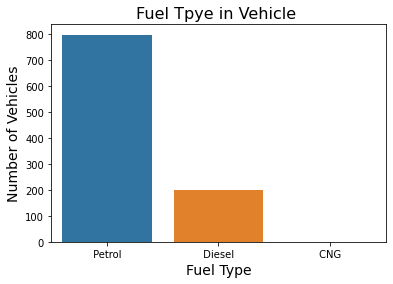

In [165]:
sns.countplot(x = df['Fuel Type'])
plt.title('Fuel Tpye in Vehicle ', fontsize = 16)
plt.xlabel('Fuel Type', fontsize = 14)
plt.ylabel('Number of Vehicles', fontsize = 14)

Text(0, 0.5, 'Number of Vehicles')

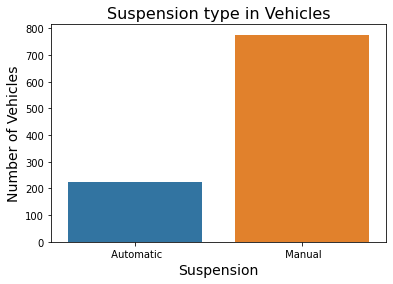

In [166]:
sns.countplot(x = df['Suspension'])
plt.title('Suspension type in Vehicles', fontsize = 16)
plt.xlabel('Suspension', fontsize = 14)
plt.ylabel('Number of Vehicles', fontsize = 14)

<Figure size 432x288 with 0 Axes>

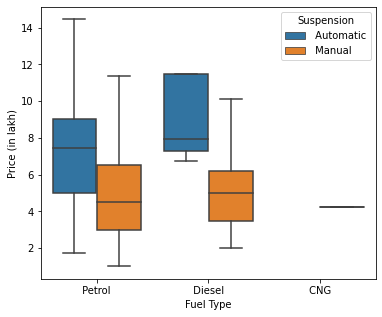

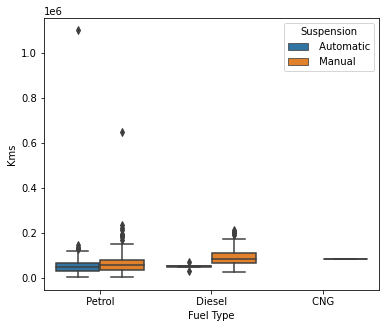

In [167]:
plt.figure(1)
plt.figure(figsize=(6,5))
ax=sns.boxplot(y = df['Price (in lakh)'], x= df['Fuel Type'],hue=df.Suspension, showfliers = False)

plt.figure(2)
plt.figure(figsize=(6,5))
ax1 = sns.boxplot(y = df['Kms'], x= df['Fuel Type'],hue=df.Suspension)

In [168]:
# Removing outliers
df.drop(df.loc[df['Kms'] >= 0.6e6].index,axis=0,inplace=True)

<Figure size 432x288 with 0 Axes>

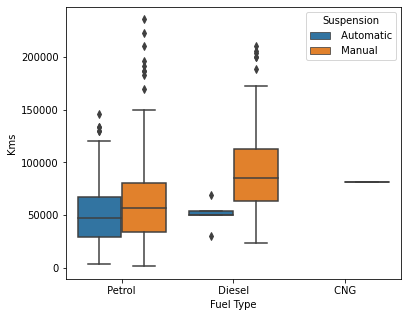

In [169]:
plt.figure(2)
plt.figure(figsize=(6,5))
ax1 = sns.boxplot(y = df['Kms'], x= df['Fuel Type'],hue=df.Suspension)

In [32]:
df.nunique()

Year                22
Fuel Type            3
Suspension           2
Car Model          183
Kms                693
Price (in lakh)    332
dtype: int64

Text(0.5, 0, 'Year')

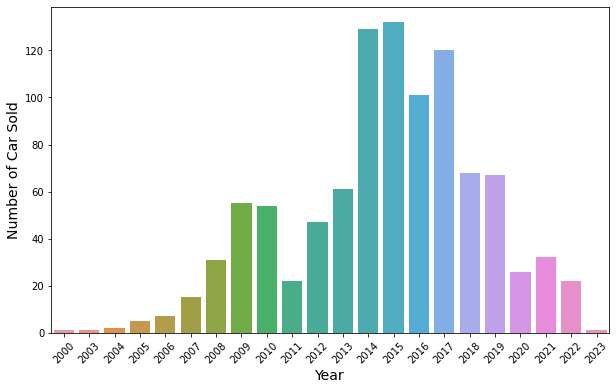

In [129]:
plt.figure(figsize = (10, 6))
sns.countplot(x = df['Year'], data=df,)
plt.xticks(rotation = 45)
plt.ylabel('Number of Car Sold', fontsize = 14)
plt.xlabel('Year', fontsize = 14)

Text(0, 0.5, 'Year')

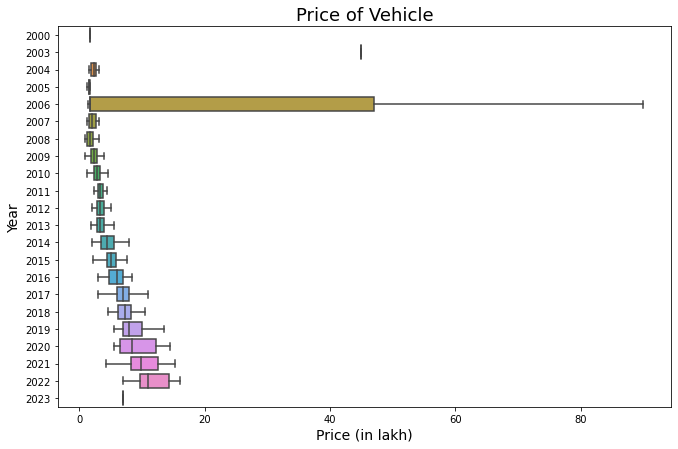

In [49]:
plt.figure(figsize = (11, 7))
ax = sns.boxplot(x='Price (in lakh)', y = 'Year', data = df, orient = 'h', showfliers = False)

ax.set_title('Price of Vehicle', fontsize = 18)
ax.set_xlabel('Price (in lakh)', fontsize = 14)
ax.set_ylabel('Year', fontsize = 14)


Text(0, 0.5, 'Price (in lakh)')

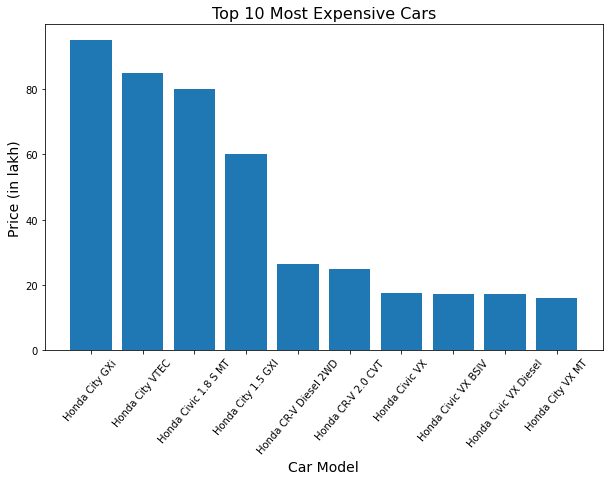

In [127]:
df_sorted = df.sort_values('Price (in lakh)', ascending = False)
top_10 = df_sorted.head(13)

plt.figure(figsize = (10, 6))
plt.bar(top_10['Car Model'], top_10['Price (in lakh)'])
plt.xticks(rotation = 50)
plt.title('Top 10 Most Expensive Cars', fontsize = 16)
plt.xlabel('Car Model', fontsize = 14)
plt.ylabel('Price (in lakh)', fontsize = 14)


Text(0, 0.5, 'Price (in lakh)')

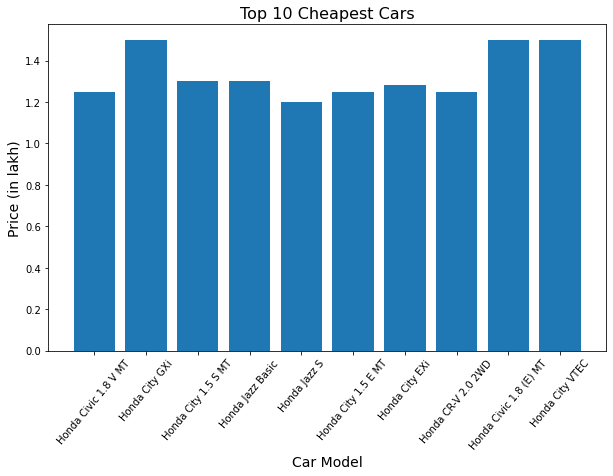

In [126]:
df_sorted = df.sort_values('Price (in lakh)', ascending = True)
top_10 = df_sorted.head(27)

plt.figure(figsize = (10, 6))
plt.bar(top_10['Car Model'], top_10['Price (in lakh)'])
plt.xticks(rotation = 50)
plt.title('Top 10 Cheapest Cars', fontsize = 16)
plt.xlabel('Car Model', fontsize = 14)
plt.ylabel('Price (in lakh)', fontsize = 14)


Text(0, 0.5, 'Number of Vehicle')

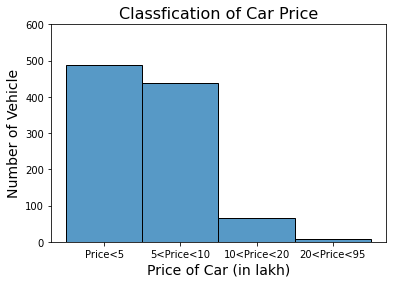

In [125]:
df['Classification'] = pd.cut(df['Price (in lakh)'], bins = [0, 5, 10, 20, 95], labels = ['Price<5', '5<Price<10', '10<Price<20', '20<Price<95'])

sns.histplot(x = df['Classification'])
plt.ylim([0, 600])
plt.title('Classfication of Car Price', fontsize = 16)
plt.xlabel('Price of Car (in lakh)', fontsize = 14)
plt.ylabel('Number of Vehicle', fontsize = 14)

Text(0, 0.5, 'Number of Vehicle')

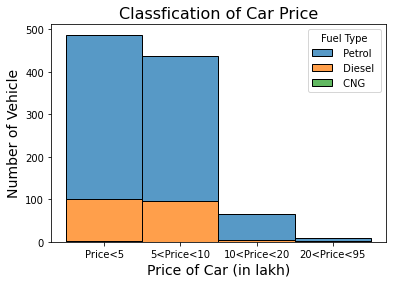

In [135]:
sns.histplot(x = 'Classification', hue = df['Fuel Type'], bins = 4, multiple = 'stack', data = df)

plt.title('Classfication of Car Price', fontsize = 16)
plt.xlabel('Price of Car (in lakh)', fontsize = 14)
plt.ylabel('Number of Vehicle', fontsize = 14)

Text(0, 0.5, 'Number of Vehicle')

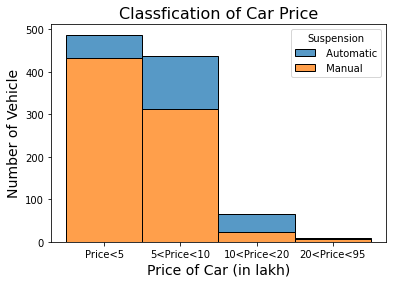

In [137]:
sns.histplot(x = 'Classification', hue = df['Suspension'], bins = 4, multiple = 'stack', data = df)

plt.title('Classfication of Car Price', fontsize = 16)
plt.xlabel('Price of Car (in lakh)', fontsize = 14)
plt.ylabel('Number of Vehicle', fontsize = 14)

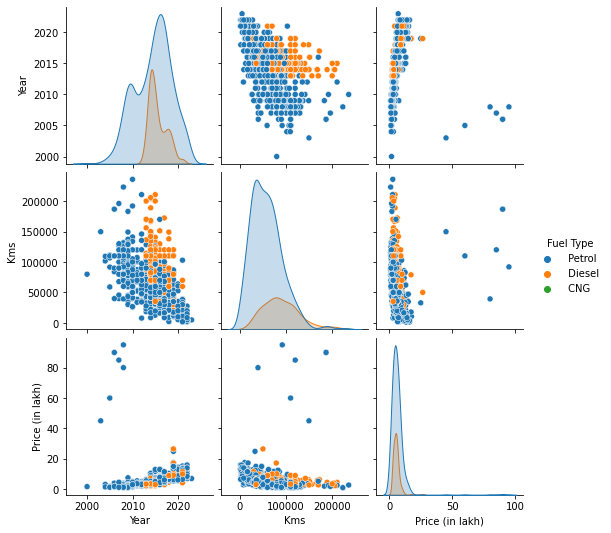

In [170]:
sns.pairplot(df,hue='Fuel Type')
